In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.drop(['customerID'],axis=1,inplace=True)

In [11]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

22

In [17]:
df.shape

(7043, 20)

In [19]:
df['TotalCharges'].unique

<bound method Series.unique of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [21]:
df[df["TotalCharges"].isin([' ','NA','-'])==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [23]:
# Replaceing Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [25]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

In [27]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

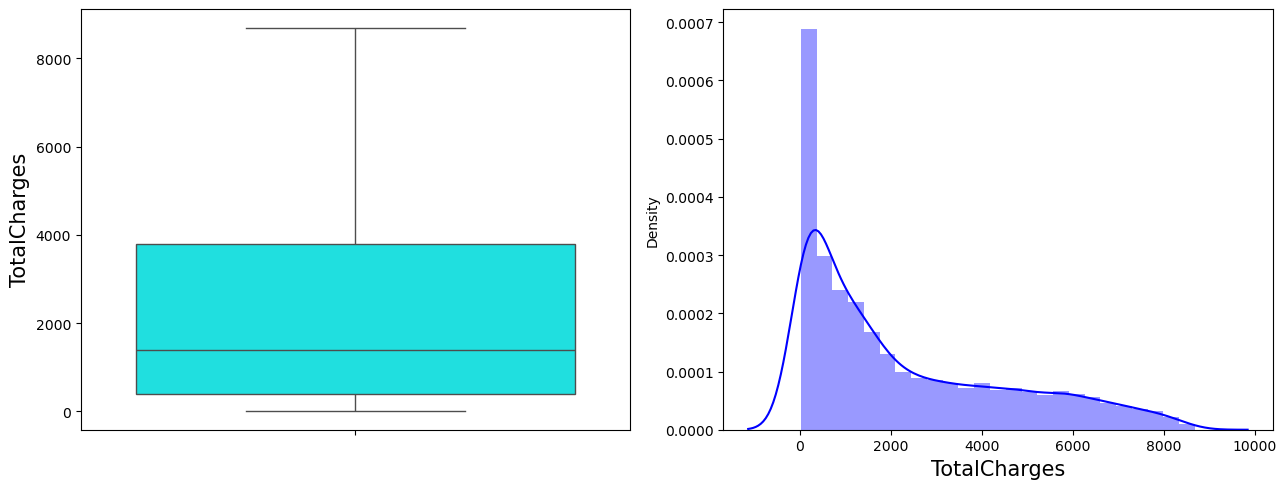

In [29]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [31]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [35]:
Numerical=df.select_dtypes(exclude="object")
Categorical=df.select_dtypes(include="object")


In [37]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [39]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7043, 20)
Shape of the dataframe after removing outliers:  (6361, 20)
Percentage of data loss post outlier removal:  9.683373562402386


In [41]:
df.drop(['PhoneService'],axis=1,inplace=True)  #1 can impact ML

In [43]:
df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.899649
Churn               1.053055
dtype: float64

In [45]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

In [47]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.006666,-0.003095,0.015081,0.000705,-0.007232,0.001883,-0.016543,-0.009229,-0.003004,-0.009510,-0.005602,-0.002749,-0.000091,-0.018561,0.023108,-0.013267,-0.009136,-0.011212
SeniorCitizen,-0.006666,1.000000,0.014985,-0.212450,0.018998,0.153645,-0.040567,-0.123628,-0.020639,-0.023526,-0.144616,0.028561,0.047145,-0.139921,0.155571,-0.043247,0.239209,0.113226,0.148802
Partner,-0.003095,0.014985,1.000000,0.454535,0.385531,0.150238,-0.006811,0.151603,0.155452,0.168046,0.132586,0.134436,0.128787,0.299346,-0.009456,-0.150912,0.091645,0.341936,-0.154692
Dependents,0.015081,-0.212450,0.454535,1.000000,0.161524,-0.026347,0.051687,0.146629,0.090982,0.083529,0.130405,0.049732,0.024854,0.243697,-0.106037,-0.039747,-0.129008,0.088603,-0.159481
tenure,0.000705,0.018998,0.385531,0.161524,1.000000,0.360691,-0.038332,0.326014,0.377266,0.367755,0.324150,0.283530,0.293767,0.675544,0.003627,-0.364802,0.245389,0.827466,-0.349681
MultipleLines,-0.007232,0.153645,0.150238,-0.026347,0.360691,1.000000,-0.109861,0.007312,0.125802,0.130775,0.011859,0.188227,0.194299,0.116643,0.174347,-0.186049,0.456223,0.461046,0.040207
InternetService,0.001883,-0.040567,-0.006811,0.051687,-0.038332,-0.109861,1.000000,-0.026160,0.031031,0.050406,-0.021632,0.099601,0.094262,0.112766,-0.165694,0.100110,-0.472724,-0.264991,-0.059137
OnlineSecurity,-0.016543,-0.123628,0.151603,0.146629,0.326014,0.007312,-0.026160,1.000000,0.199192,0.174330,0.284134,0.047993,0.063601,0.367511,-0.155053,-0.089331,-0.072293,0.206461,-0.290086
OnlineBackup,-0.009229,-0.020639,0.155452,0.090982,0.377266,0.125802,0.031031,0.199192,1.000000,0.196737,0.211105,0.152935,0.140898,0.286501,-0.020016,-0.126560,0.109520,0.308850,-0.202671
DeviceProtection,-0.003004,-0.023526,0.168046,0.083529,0.367755,0.130775,0.050406,0.174330,0.196737,1.000000,0.242925,0.279173,0.285475,0.342995,-0.041560,-0.133021,0.154115,0.316652,-0.177710


In [49]:
df.corr()['Churn']

gender             -0.011212
SeniorCitizen       0.148802
Partner            -0.154692
Dependents         -0.159481
tenure             -0.349681
MultipleLines       0.040207
InternetService    -0.059137
OnlineSecurity     -0.290086
OnlineBackup       -0.202671
DeviceProtection   -0.177710
TechSupport        -0.280404
StreamingTV        -0.036029
StreamingMovies    -0.041903
Contract           -0.397067
PaperlessBilling    0.196368
PaymentMethod       0.103970
MonthlyCharges      0.216816
TotalCharges       -0.225012
Churn               1.000000
Name: Churn, dtype: float64

In [51]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [53]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.002137,gender
1,1.152671,SeniorCitizen
2,1.472485,Partner
3,1.388938,Dependents
4,6.368117,tenure
5,1.418199,MultipleLines
6,1.604784,InternetService
7,1.247538,OnlineSecurity
8,1.198008,OnlineBackup
9,1.274020,DeviceProtection


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [61]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(X_train,Y_train)
    y_pred=dtc.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.753273965426925 on Random_state 184


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=184, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print(classification_report(Y_test, y_pred))
print()
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1376
           1       0.56      0.54      0.55       533

    accuracy                           0.75      1909
   macro avg       0.69      0.69      0.69      1909
weighted avg       0.75      0.75      0.75      1909


[[1148  228]
 [ 245  288]]


In [69]:
from sklearn.model_selection import GridSearchCV

In [71]:
parameter = {  'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy']}
GCV = GridSearchCV(DecisionTreeClassifier(),parameter)
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2']})

In [73]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}

In [75]:
Final_mod = DecisionTreeClassifier(criterion='gini',max_depth=5 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.786799371398638


In [77]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = np.array(y_pred)
df_Pred["Actual Values"] = Actual
df_Pred.head(30)

,Predicted Values,Actual Values
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0
